<a href="https://colab.research.google.com/github/siddhant4ds/fcc-machine-learning-with-python/blob/main/predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [18]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [19]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-08-06 06:52:09--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.6’

insurance.csv.6     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2024-08-06 06:52:09 (4.26 MB/s) - ‘insurance.csv.6’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# Solution

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
dataset.nunique().rename('# unique values')

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
Name: # unique values, dtype: int64

Ordinal/Binary encoding the *sex* column:

In [22]:
sex_mapping = {'female': 0, 'male': 1}
dataset['sex'] = dataset.sex.replace(sex_mapping)

Ordinal/Binary encoding the *smoker* column:

In [23]:
smoker_mapping = {'no': 0, 'yes': 1}
dataset['smoker'] = dataset.smoker.replace(smoker_mapping)

One-hot encoding the *region* column:

In [24]:
dataset = pd.get_dummies(dataset, columns=['region'], dtype='int')

Data preparation for modeling:

In [25]:
TARGET = 'expenses'
features = [f for f in dataset.columns if f != TARGET]

In [26]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(
    dataset[features], dataset[TARGET],
    test_size=0.2,
    shuffle=True,
    random_state=0
)

In [27]:
train_dataset.shape, test_dataset.shape, train_labels.shape, test_labels.shape

((1070, 9), (268, 9), (1070,), (268,))

Fitting the model:

In [28]:
preprocessor = layers.Normalization(axis=-1)
preprocessor.adapt(np.array(train_dataset))

In [35]:
model = keras.Sequential([
    preprocessor,
    layers.Dense(units=4),
    layers.Dense(units=1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [36]:
%%time

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=2e-4,
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    train_dataset, train_labels,
    epochs=1000,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

CPU times: user 8.18 s, sys: 293 ms, total: 8.48 s
Wall time: 11.3 s


# Tests

9/9 - 0s - 3ms/step - loss: 3203.4468
Testing set Mean Abs Error: 3203.45 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


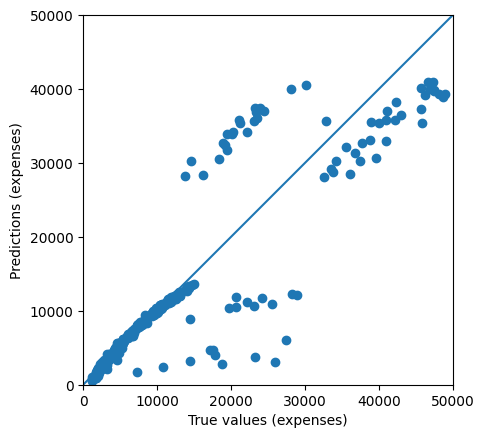

In [37]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
mae = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
